### Machine Learning Project (supervised)
`The objective of this case study is to predict the health insurance cost 
by individuals based on their age, gender, BMI, number of children, somking habit and geo-location.`

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file 
insurance_df = pd.read_csv('./Resources/insurance.csv')
insurance_df.head()
        

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Let's get info about our dataframe. 
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
#Let's perform exploratory data analysis, like check if there is any null element(s) in our data
insurance_df.isnull()


,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [5]:
# Let's confirm if there is indeed no null
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

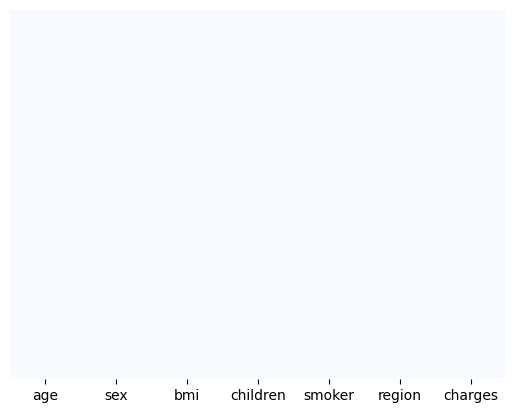

In [7]:
# Create a heatmap to determine the null value
sns.heatmap(insurance_df.isnull(), yticklabels=False, cbar=False, cmap='Blues')

In [7]:
# Get the info
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Create statistical analysis of the data
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
#Grouping by region to see any relationship with charges
# insurance_df.head()
# df_region = insurance_df.groupby(by = "region").mean()
# df_region
df_region_mean = insurance_df.groupby(by='region')[['age','bmi','children','charges']].mean()
df_region_mean

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [11]:
# Practice exercise: Group by `age`
df_age = insurance_df.groupby(by='age')[['bmi', 'children', 'charges']].mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


## Perform Task Engineering

In [12]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [13]:
# Convert the categorical variable to numerical in the 'sex' column
insurance_df['sex'] = insurance_df['sex'].apply(lambda x:0  if x == 'female' else 1)
insurance_df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [14]:
# check unique values in the 'smoker' column
insurance_df['smoker'].unique()


array(['yes', 'no'], dtype=object)

In [15]:
# Convert the categorical variable to nuberal in the 'smoker' column
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x:0 if x == 'no' else 1)
insurance_df.head()



,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [16]:
# Now, let's check the 'region' column and get the unique values
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [17]:
# Let's use Pandas .get_dummies method 
# region_dummies = pd.get_dummies(insurance_df['region'], drop_first=True)
# region_dummies

In [18]:
# insurance_df['region'] = insurance_df['region'].str.strip()

In [19]:
region_df = pd.get_dummies(insurance_df['region'], drop_first=True)
region_df

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [20]:
region_dummies = region_df.astype(int)

In [21]:
insurance_df[['northwest','southeast','southwest']] = region_dummies

In [22]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [23]:
# Let's drop the original 'region' column
insurance_df.drop(['region'], axis=1, inplace=True)

In [24]:
# Verify that `region` is dropped
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


## Perform Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

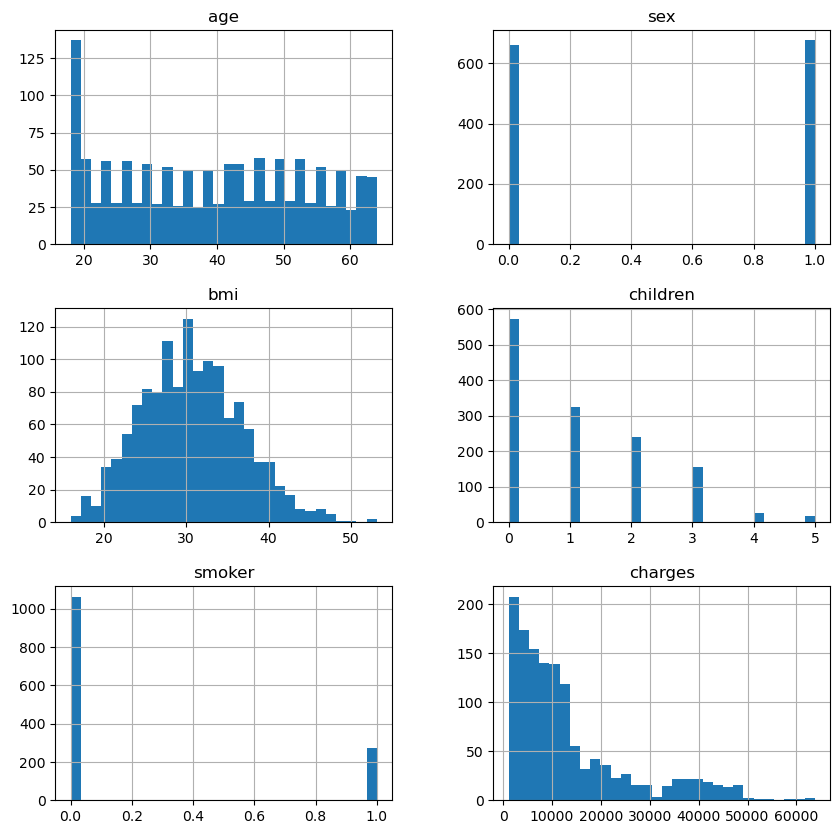

In [25]:
# Plot histogram for the `age`, `sex`, `bmi`, `children`, `smoker`,`charges`
insurance_df[['age','sex','bmi','children','smoker','charges']].hist(bins = 30, figsize=(10, 10))

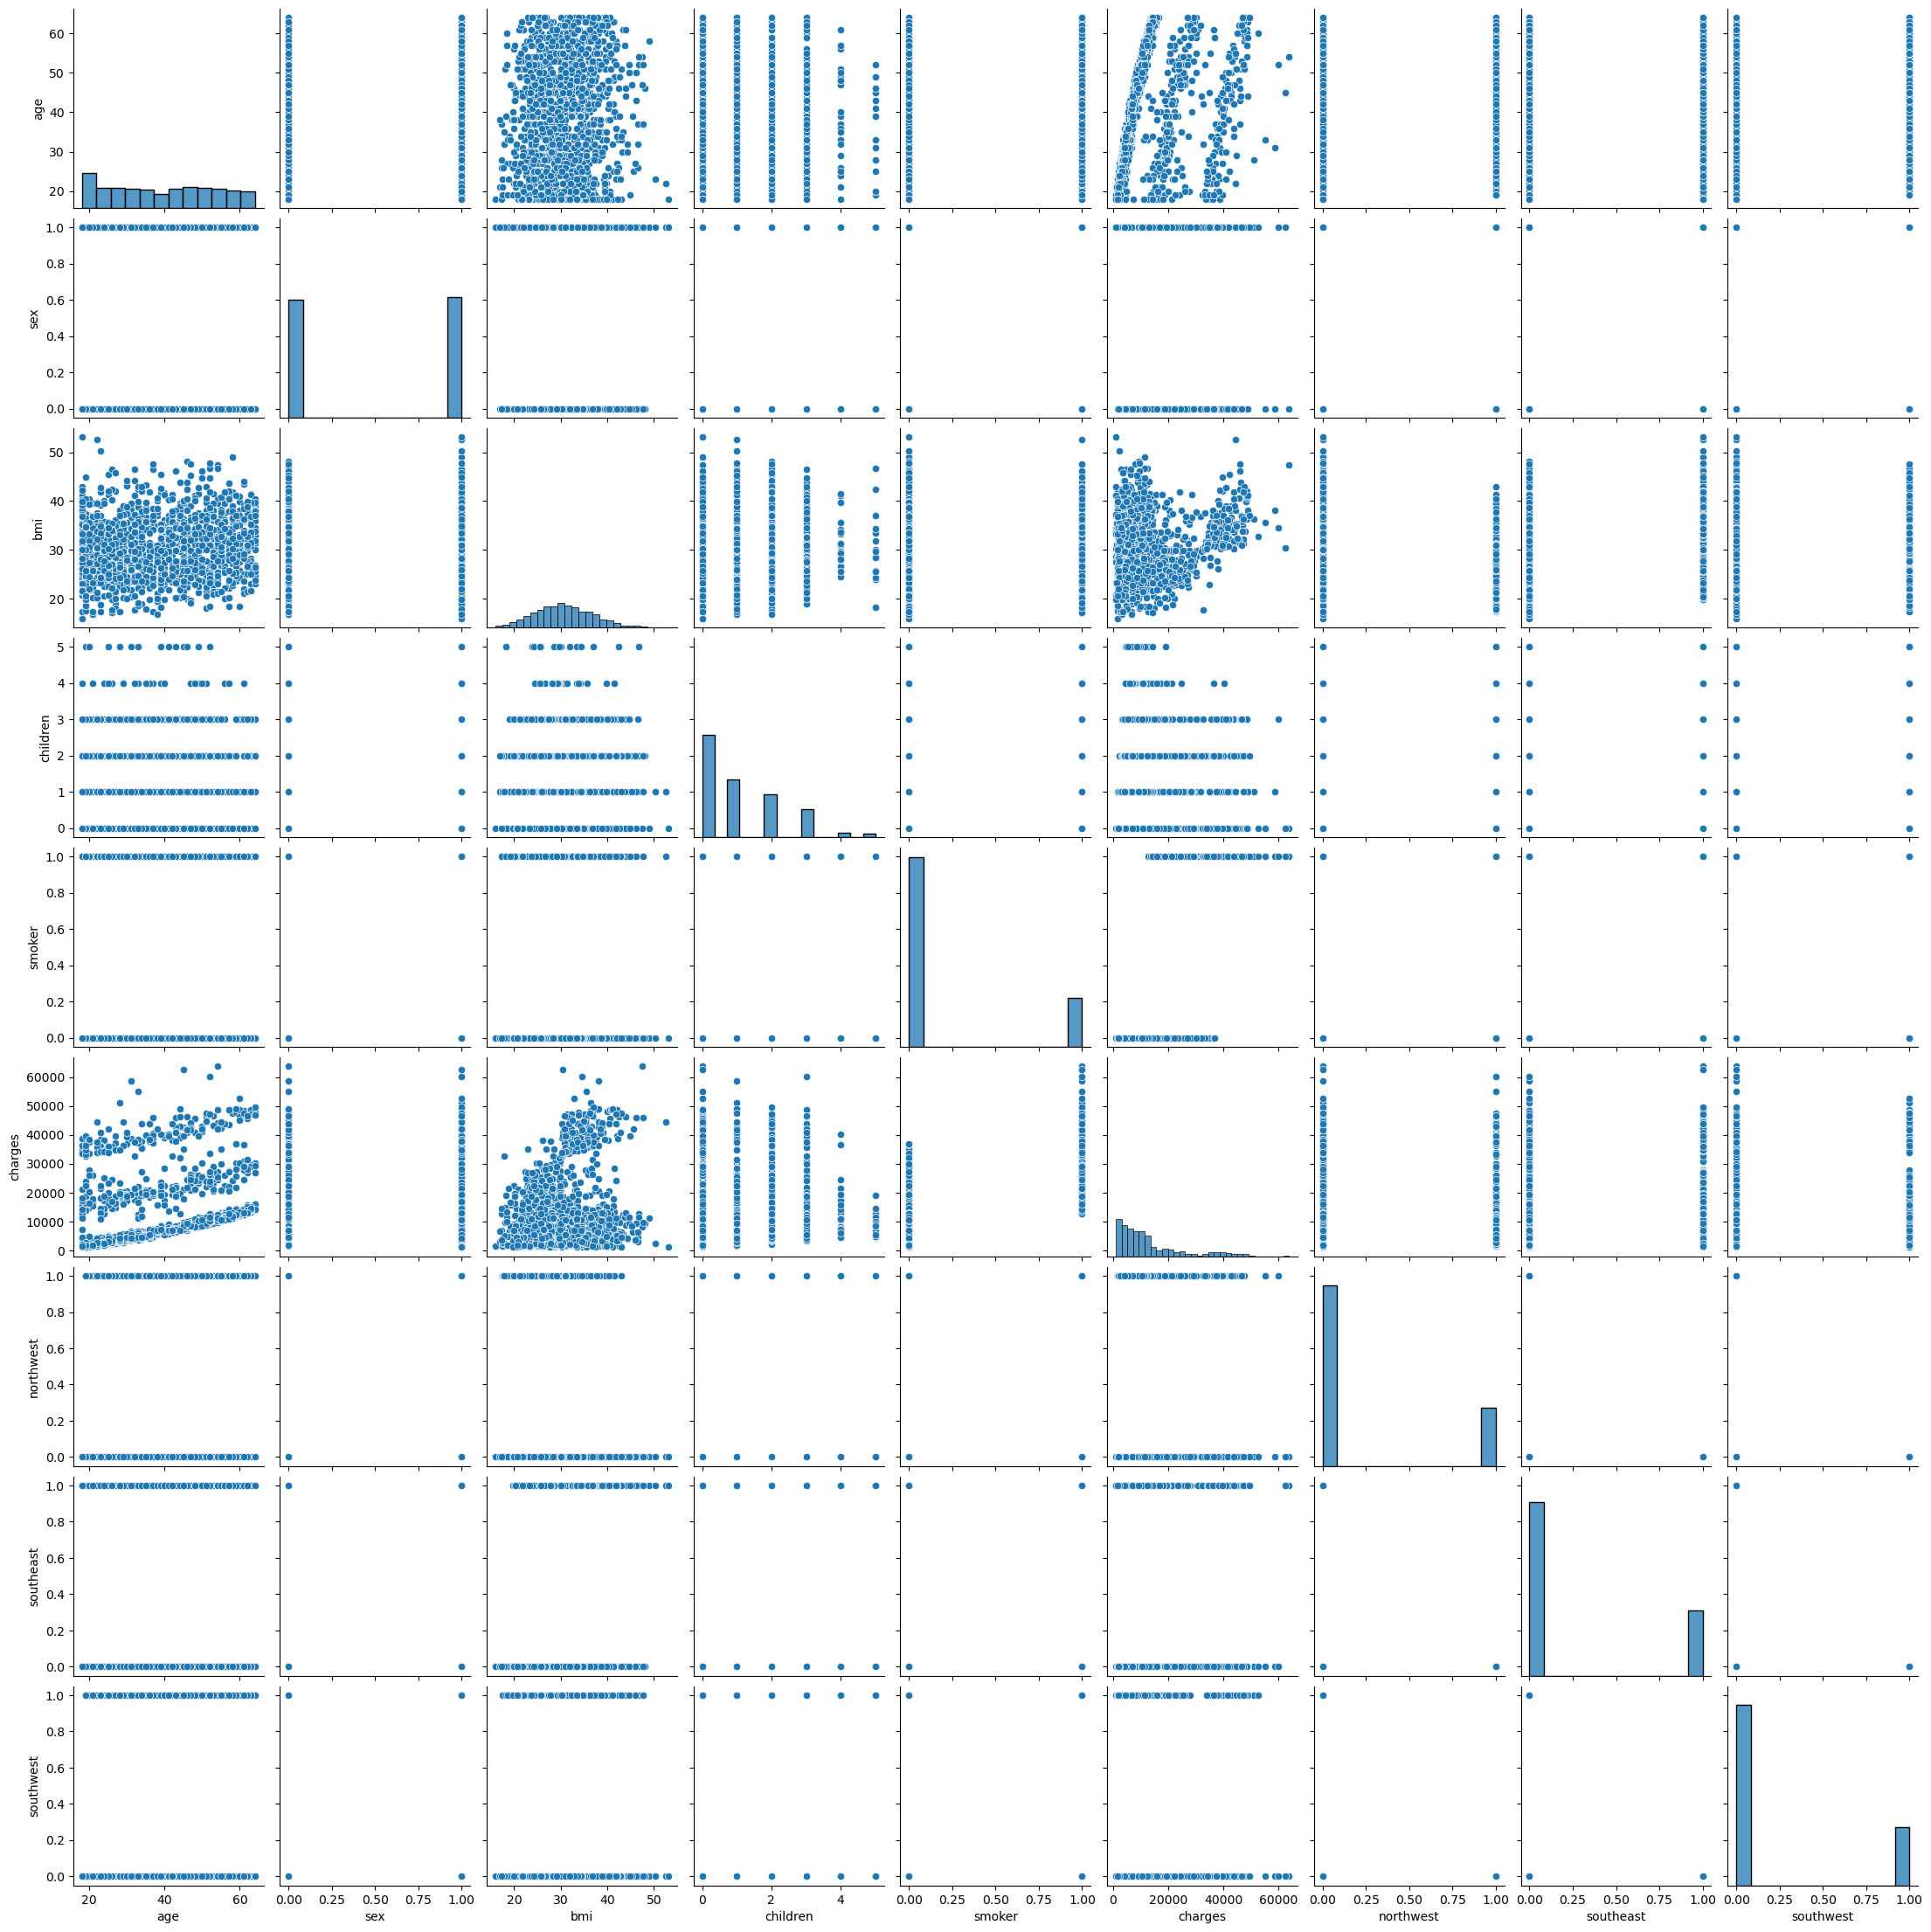

In [26]:
import warnings

# Suppress FutureWarning for is_categorical_dtype
warnings.simplefilter(action='ignore', category=FutureWarning)

# Use Seaborn to plot pairplot
sns.pairplot(insurance_df)

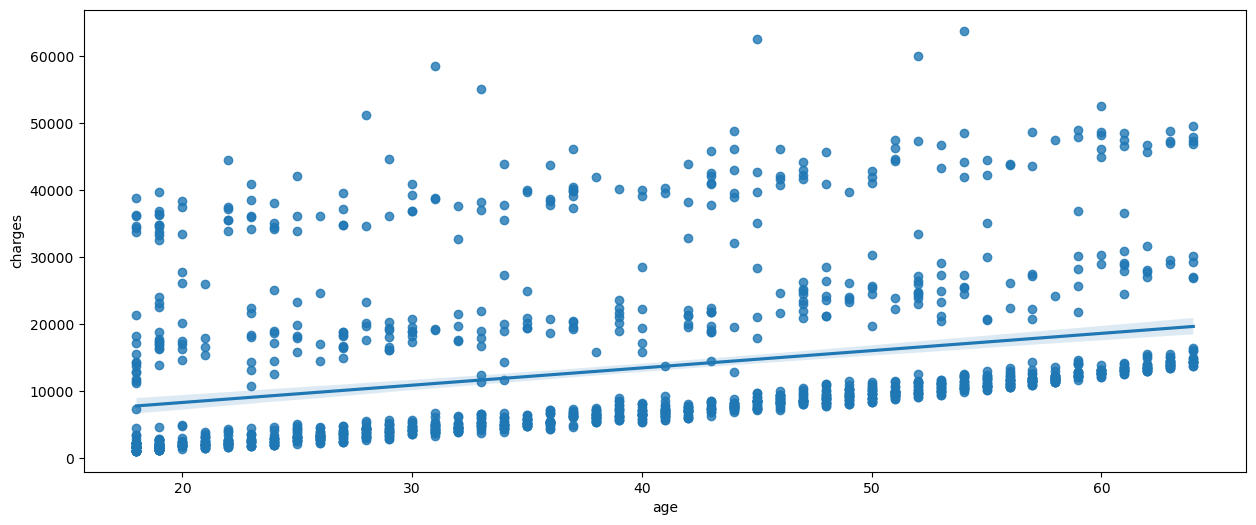

In [27]:
# Plot regression of `age` vs `charges` using Seaborn .regplot() function
plt.figure(figsize=(15,6))
sns.regplot(x = 'age', y= 'charges', data= insurance_df)
plt.show()

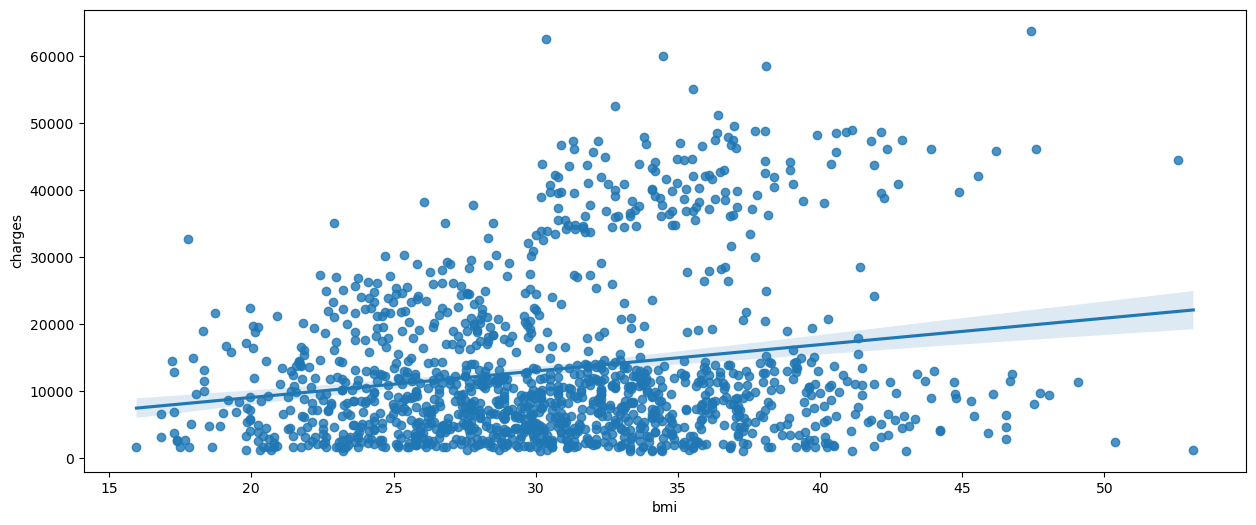

In [28]:
# Let's do regression for the `bmi` vs `charges`
plt.figure(figsize=(15,6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()

### Practice opportunity #2
    - Calculate and plot the correlation matrix
    - Which feature had the most positive correlation with charges?

In [29]:
# Calculate and plot the correlation matrix
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

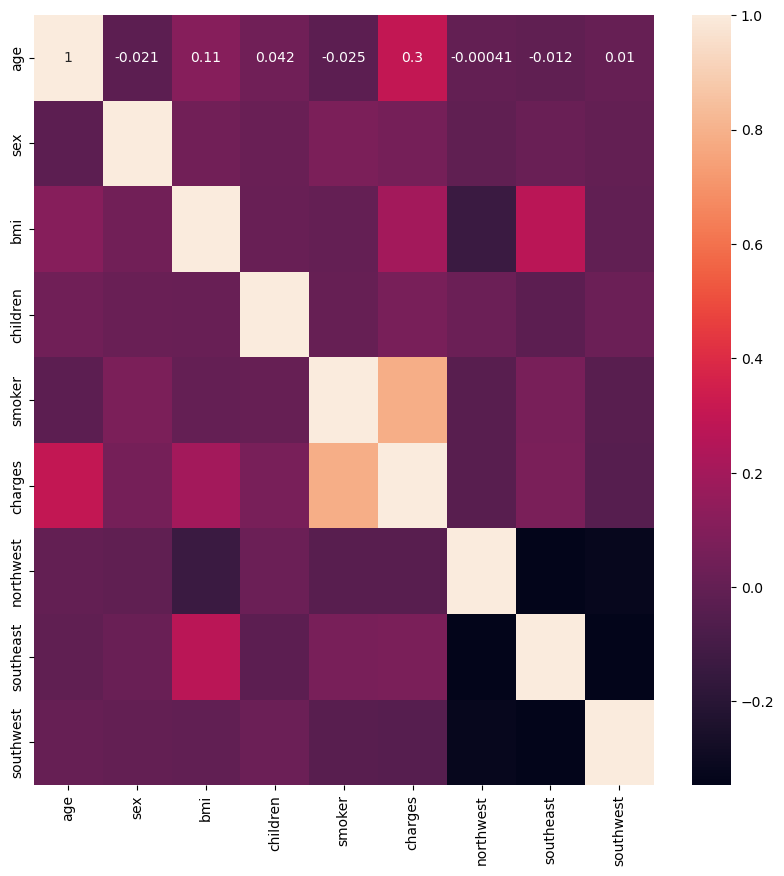

In [30]:
# Create a heatmap 
plt.figure(figsize = (10, 10))
sns.heatmap(insurance_df.corr(), annot=True)

## Create Training and Testing of Dataset

In [31]:
#let's print all columns
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [32]:
# let's divide our data into `inputs` represented by capital `X` and `output` represented by lowercase `y`, which is the `charges' column
X = insurance_df.drop(columns = ['charges'])
y = insurance_df[['charges']]


In [33]:
# Show X
X.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0


In [34]:
# Show y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [35]:
# Let's check the shape or X (or samples)
X.shape

(1338, 8)

In [36]:
# Let's check the shape of y samples
y.shape

(1338, 1)

In [37]:
# Let's convert our data into a numpy array with the type as `float32`
# Note: the purpose of this is to create a column to produce (1338, 1), but this was already created earlier
# So, line [37] through line [39] are optional
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [38]:
# Now, reshape the data
y = y.reshape(-1,1)

In [39]:
# Only take the numerical variables and scale them 
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [40]:
# Now, let's also check what's in `y`
y.shape

(1338, 1)

In [45]:
# Install scikit-learn in the virtual environment
# Let's scale our input and output data before we train it using machine learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Instantiate object using StandardScaler() and transform
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

#Instantiate the the y data
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


### Practive Opportunity #3
 - Split the data into 20% Testing and 80% Training
 - Double check that the split was succesfful by getting the shape of both the training and testing datasets

## Train and Evaluate a Linear Regression model in scikit-learn